In [1]:
install.packages("arules")
library("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [17]:
data<-read.transactions("/content/groceries - groceries.csv")
inspect(data)

Warning message in readLines(file, encoding = encoding):
“incomplete final line found on '/content/groceries - groceries.csv'”
Warning message in asMethod(object):
“removing duplicated items in transactions”
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



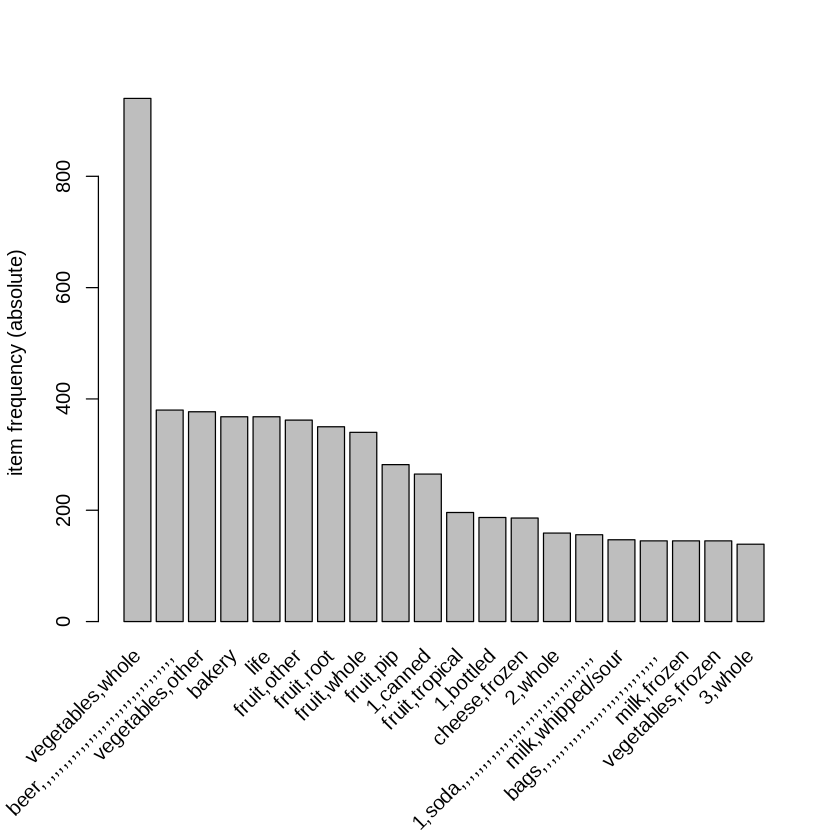

In [18]:
itemFrequencyPlot(data,topN=20,type="absolute")

In [19]:
rules_basket<- apriori(data)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 983 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[9574 item(s), 9836 transaction(s)] done [0.02s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [20]:
rules_basket<-apriori(data,parameter = list(supp = 0.01, conf=0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[9574 item(s), 9836 transaction(s)] done [0.02s].
sorting and recoding items ... [31 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [5 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [21]:
inspect(rules_basket[1:5])

    lhs                                     
[1] {1,whole}                             =>
[2] {milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,} =>
[3] {1,canned}                            =>
[4] {bakery}                              =>
[5] {life}                                =>
    rhs                                   support    confidence coverage  
[1] {milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,} 0.01230175 1.0000000  0.01230175
[2] {1,whole}                             0.01230175 0.9379845  0.01311509
[3] {beer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,} 0.02643351 0.9811321  0.02694185
[4] {life}                                0.03741358 1.0000000  0.03741358
[5] {bakery}                              0.03741358 1.0000000  0.03741358
    lift     count
[1] 76.24806 121  
[2] 76.24806 121  
[3] 25.39583 260  
[4] 26.72826 368  
[5] 26.72826 368  


In [22]:
rules_basket<-sort(rules_basket, by="confidence", decreasing=TRUE)
inspect(rules_basket)


    lhs                                     
[1] {1,whole}                             =>
[2] {bakery}                              =>
[3] {life}                                =>
[4] {1,canned}                            =>
[5] {milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,} =>
    rhs                                   support    confidence coverage  
[1] {milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,} 0.01230175 1.0000000  0.01230175
[2] {life}                                0.03741358 1.0000000  0.03741358
[3] {bakery}                              0.03741358 1.0000000  0.03741358
[4] {beer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,} 0.02643351 0.9811321  0.02694185
[5] {1,whole}                             0.01230175 0.9379845  0.01311509
    lift     count
[1] 76.24806 121  
[2] 26.72826 368  
[3] 26.72826 368  
[4] 25.39583 260  
[5] 76.24806 121  


In [28]:
rules_basket<-apriori(data=data, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="life"),
control = list(verbose=F))

rules_basket<-sort(rules_basket, decreasing=TRUE, by="confidence")
inspect(rules_basket)

     lhs                                         rhs        support confidence    coverage      lift count
[1]  {1,long}                                 => {life} 0.001118341 1.00000000 0.001118341 26.728261    11
[2]  {product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,} => {life} 0.001118341 1.00000000 0.001118341 26.728261    11
[3]  {product,,,,,,,,,,,,,,,,,,,,,,,,,,,,}    => {life} 0.001016673 1.00000000 0.001016673 26.728261    10
[4]  {product,,,,,,,,,,,,,,,,,,,,,,,,,}       => {life} 0.001016673 1.00000000 0.001016673 26.728261    10
[5]  {product,,,,,,,,,,,,,,,,,,,,,,,,}        => {life} 0.001016673 1.00000000 0.001016673 26.728261    10
[6]  {bread,long}                             => {life} 0.001220008 1.00000000 0.001220008 26.728261    12
[7]  {product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,}   => {life} 0.001830012 1.00000000 0.001830012 26.728261    18
[8]  {beverages,long}                         => {life} 0.001016673 1.00000000 0.001016673 26.728261    10
[9]  {product,,,,,,,,,,,,,,,,,,,,,,,,

In [29]:
install.packages("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




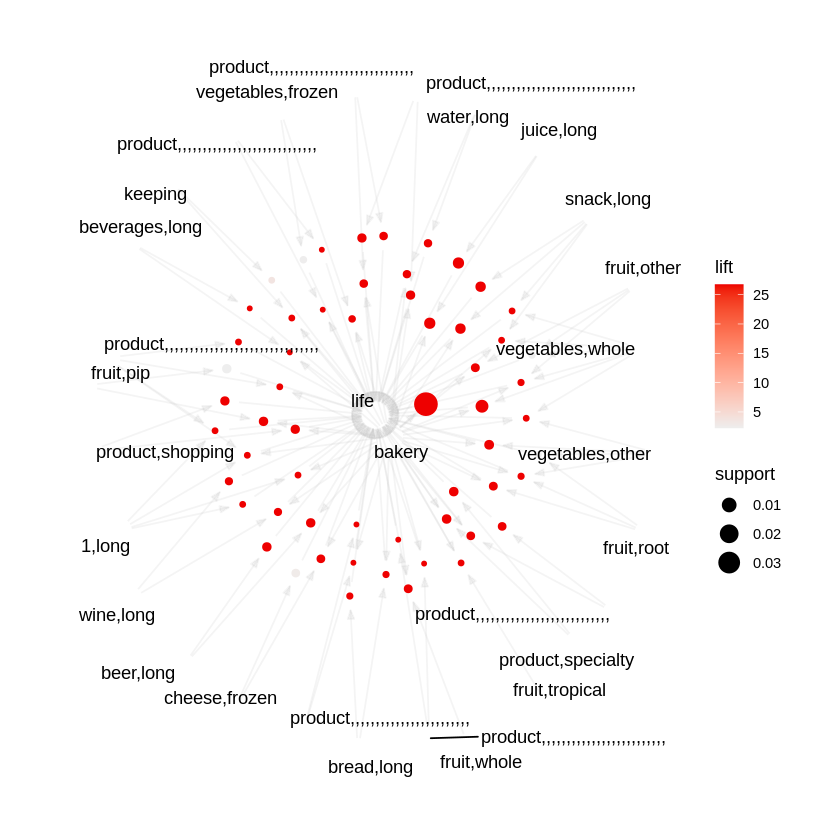

In [30]:
library(arulesViz)
plot(rules_basket,method="graph")